In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
df = pd.read_csv("/workspaces/codespaces-jupyter/data/Social_Network_Ads.csv")

In [54]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [55]:
df = df.drop(columns=['Gender','User ID'])
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [56]:
df.sample(5)
df.shape

(400, 3)

train test split

In [57]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.iloc[:,0:2],df['Purchased'],test_size=0.3,random_state=0)
X_train.shape,X_test.shape

((280, 2), (120, 2))

Standard scalar

In [58]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
# fit the scalar to the train set, it will learn the parameter
scalar.fit(X_train)

#transform train and test series
X_train_scaled = scalar.transform(X_train)
X_test_scaled = scalar.transform(X_test)

In [59]:
# we always learn(fit) from the training data but transform the test and train data both

In [60]:
scalar.mean_ # first value in array is the mean of age and 2nd is of salary

array([3.78642857e+01, 6.98071429e+04])

In [61]:
X_train_scaled

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

In [62]:
X_test_scaled

array([[-0.77101313,  0.49720103],
       [ 0.0133054 , -0.57280368],
       [-0.28081405,  0.15017248],
       [-0.77101313,  0.26584866],
       [-0.28081405, -0.57280368],
       [-1.06513258, -1.44037507],
       [-0.67297331, -1.5849703 ],
       [-0.18277423,  2.14558666],
       [-1.94749093, -0.05226085],
       [ 0.89566375, -0.775237  ],
       [-0.77101313, -0.60172273],
       [-0.96709276, -0.42820845],
       [-0.08473441, -0.42820845],
       [ 0.11134522,  0.20801057],
       [-1.7514113 ,  0.46828198],
       [-0.5749335 ,  1.36477242],
       [-0.08473441,  0.20801057],
       [-1.84945111,  0.43936294],
       [ 1.67998229,  1.74072002],
       [-0.28081405, -1.38253697],
       [-0.28081405, -0.65956082],
       [ 0.89566375,  2.14558666],
       [ 0.30742485, -0.54388463],
       [ 0.89566375,  1.01774386],
       [-1.45729185, -1.2090227 ],
       [ 1.09174339,  2.05882953],
       [-0.96709276,  0.49720103],
       [-0.86905295,  0.29476771],
       [-0.08473441,

here if we see X_train_scaled and X_test_scaled both are in the form of numpy array while we pass X_train and X_test as dataframe. for further use we need to convert them in dataframe 

In [63]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns = X_test.columns)

In [64]:
X_train_scaled

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


In [65]:
np.round(X_train.describe(),2)

,Age,EstimatedSalary
count,280.00,280.00
mean,37.86,69807.14
std,10.22,34641.20
min,18.00,15000.00
25%,30.00,43000.00
50%,37.00,70500.00
75%,46.00,88000.00
max,60.00,150000.00


In [66]:
#in above cell we find mean!=0 and SD!=1
np.round(X_train_scaled.describe(),2)

,Age,EstimatedSalary
count,280.00,280.00
mean,0.00,0.00
std,1.00,1.00
min,-1.95,-1.58
25%,-0.77,-0.78
50%,-0.08,0.02
75%,0.80,0.53
max,2.17,2.32


In [67]:
#in above cell we can that, see after standardization mean = 0 and SD = 1

<h2>effect of sclaing 

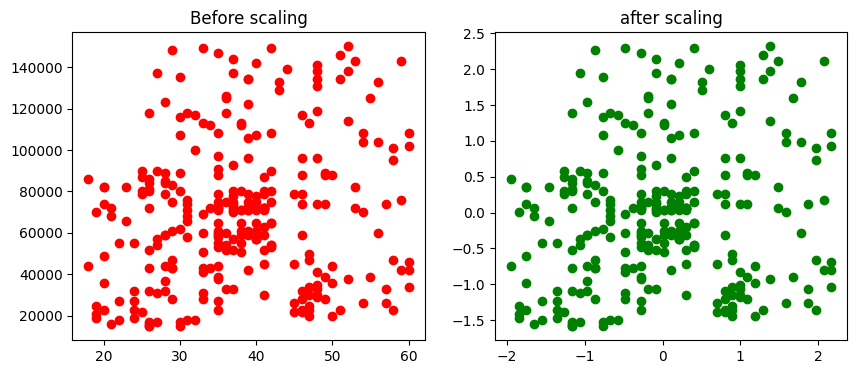

In [68]:
fig, (ax1,ax2) = plt.subplots(ncols = 2,figsize = (10,4))
ax1.scatter(X_train['Age'],X_train['EstimatedSalary'],color = "red")
ax1.set_title("Before scaling")


ax2.scatter(X_train_scaled['Age'],X_train_scaled['EstimatedSalary'],color = "green")
ax2.set_title("after scaling")
plt.show()

In [69]:
# even after the scaling distribution of the data is similar

we can also see the variation using probability distribution plot

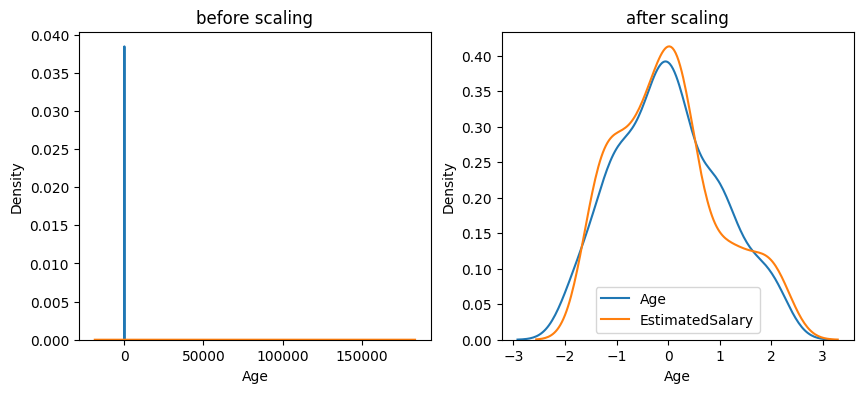

In [70]:
fig, (ax1,ax2) = plt.subplots(ncols = 2,figsize = (10,4))

#before scaling
sns.kdeplot(X_train['Age'],ax = ax1,label='Age')
sns.kdeplot(X_train['EstimatedSalary'],ax = ax1,label='EstimatedSalary')
ax1.set_title("before scaling")
#after scaling
sns.kdeplot(X_train_scaled['Age'],ax = ax2,label='Age')
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax = ax2,label='EstimatedSalary')
ax2.set_title("after scaling")
plt.legend()
plt.show()

in above figure we can see that , before scaling, because of the smaller value of age it's distribution is very narrow and is in the form of a vertical line. while salary has larger spread thus it is in the form of a horizontal st line shaowing the spread.
in 2nd figure after scaling , both have a balanced spread.

<h2> comparison of spread</h2>

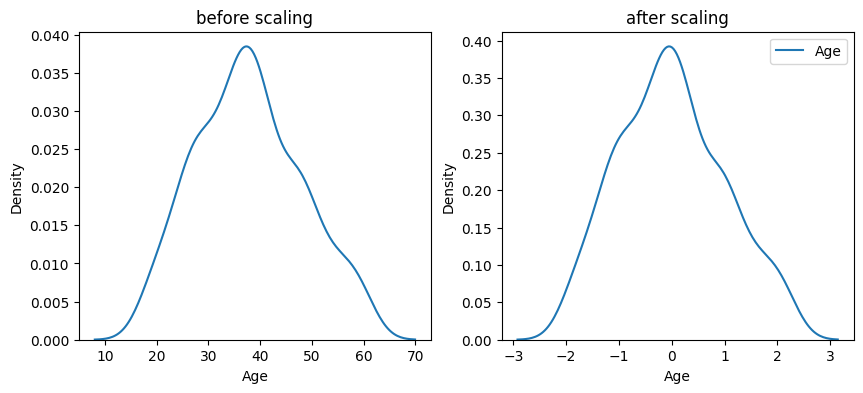

In [71]:
fig, (ax1,ax2) = plt.subplots(ncols = 2,figsize = (10,4))

#before scaling
sns.kdeplot(X_train['Age'],ax = ax1,label='Age')
ax1.set_title("before scaling")
#after scaling
sns.kdeplot(X_train_scaled['Age'],ax = ax2,label='Age')
ax2.set_title("after scaling")
plt.legend()
plt.show()

Text(0.5, 1.0, 'after scaling')

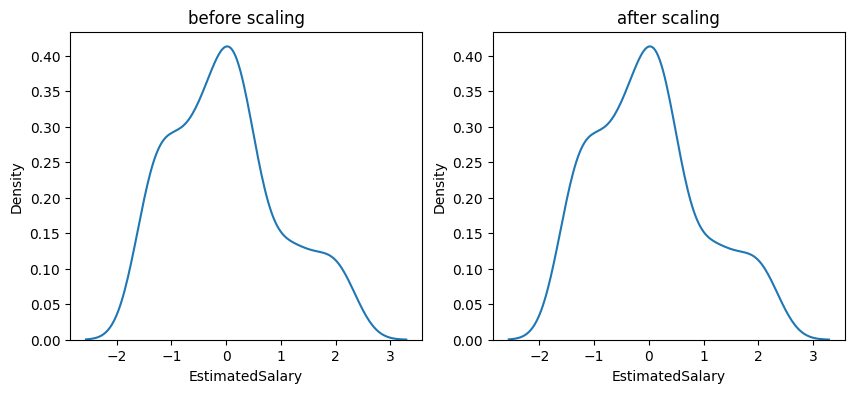

In [72]:
fig, (ax1,ax2) = plt.subplots(ncols = 2,figsize = (10,4))

#before scaling
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax = ax1,label='Age')
ax1.set_title("before scaling")
#after scaling
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax = ax2,label='Age')
ax2.set_title("after scaling")

comparison shows, both the columns i.e age and estimated salary , before and after scaling look same

<h3> why scaling is important </h3>

<b>there are certain algorithms like logistic regression and linear regression, which performs well on the scaled data while accuracy reduces if we don't scale the data<b>

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [85]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [86]:
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

LogisticRegression()

In [87]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [88]:
print(f" accuracy score before scaling is:{accuracy_score(y_test,y_pred)}")
print(f" accuracy score after scaling is:{accuracy_score(y_test,y_pred_scaled)}")


 accuracy score before scaling is:0.875
 accuracy score after scaling is:0.8666666666666667


there are some algorithm like Decision tree classifier which is not affected by scaling